In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [2]:
   insurance = pd.read_csv('/content/insurance.csv')

In [3]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance.shape

(1338, 7)

In [5]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Figure size 432x432 with 0 Axes>

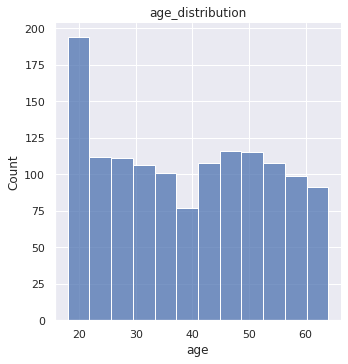

In [6]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['age'])
plt.title('age_distribution')
plt.show()

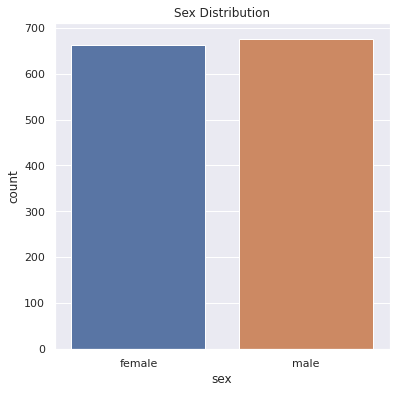

In [7]:
plt.figure(figsize=(6,6))
sns.countplot(x='sex',data=insurance)
plt.title('Sex Distribution')
plt.show()

In [8]:
insurance['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

<Figure size 432x432 with 0 Axes>

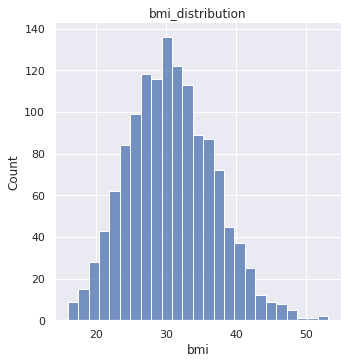

In [9]:
sns.set()
plt.figure(figsize=(6,6))
sns.displot(insurance['bmi'])
plt.title('bmi_distribution')
plt.show()

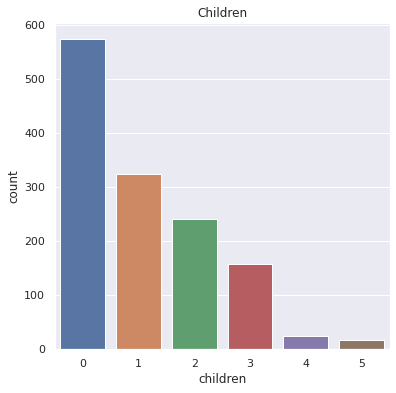

In [10]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance)
plt.title('Children')
plt.show()

In [11]:
insurance['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

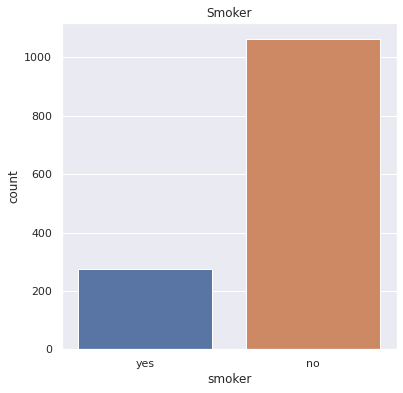

In [12]:
plt.figure(figsize=(6,6))
sns.countplot(x='smoker',data=insurance)
plt.title('Smoker')
plt.show()

In [13]:
insurance['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

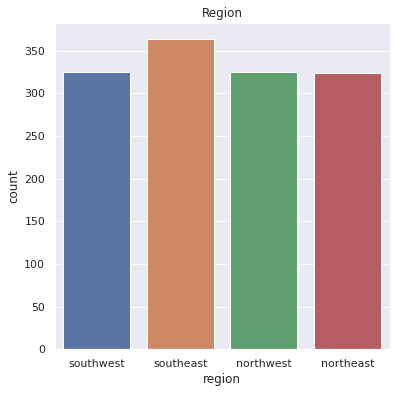

In [14]:
plt.figure(figsize=(6,6))
sns.countplot(x='region',data=insurance)
plt.title('Region')
plt.show()

In [15]:
insurance['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

<Figure size 432x432 with 0 Axes>

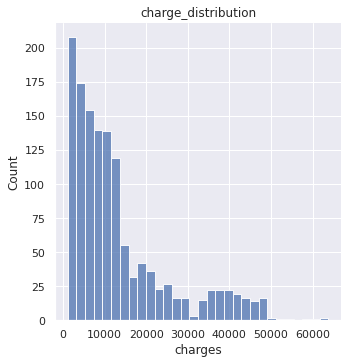

In [16]:
plt.figure(figsize=(6,6))
sns.displot(insurance['charges'])
plt.title('charge_distribution')
plt.show()

In [17]:
categorical_features=insurance[["sex","smoker","region"]]

In [18]:
dummies=pd.get_dummies(data=categorical_features,drop_first=True)

In [19]:
dummies

,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,0,1,0,0,1
1,1,0,0,1,0
2,1,0,0,1,0
3,1,0,1,0,0
4,1,0,1,0,0
...,...,...,...,...,...
1333,1,0,1,0,0
1334,0,0,0,0,0
1335,0,0,0,1,0
1336,0,0,0,0,1


In [22]:
insurance.drop(['sex','smoker','region'],axis=1,inplace=True)

In [23]:
dataset = pd.concat([insurance,dummies],axis=1)

In [25]:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [29]:
dataset.drop(['charges'],axis=1,inplace=True)

In [30]:
X =dataset
Y = insurance['charges']

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(1338, 8) (1070, 8) (268, 8)


In [34]:
regressor = LinearRegression()

In [35]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [36]:
training_data_prediction = regressor.predict(X_train)

In [37]:
r2_train = metrics.r2_score(Y_train,training_data_prediction)

In [40]:
print('R squared value : ',r2_train)

R squared value :  0.7520187377309014


In [42]:
testing_data_prediction = regressor.predict(X_test)

In [44]:
r2_test = metrics.r2_score(Y_test,testing_data_prediction)

In [47]:
print('R squared value : ',r2_test)

R squared value :  0.7449415564623685
